In [1]:
%reset -f
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.size'] = 15
import matplotlib
matplotlib.rcParams['xtick.major.pad']='8'
matplotlib.rcParams['ytick.major.pad']='5'

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"

matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=25) 
matplotlib.rcParams['xtick.major.pad']='8'
matplotlib.rcParams['ytick.major.pad']='5'
matplotlib.rcParams.update({'font.size': 15})

matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=25) 
matplotlib.rcParams.update({'font.size': 25})
FS = 25
lw =2
matplotlib.rcParams['xtick.major.pad']='10'
matplotlib.rcParams['ytick.major.pad']='7'

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import mpltex
from matplotlib.patches import PathPatch

In [2]:
def tf_by_td_inertial(tm_by_td,tg_by_td,U0=3.):
    return np.exp(U0)/U0*(  np.sqrt(U0*tm_by_td) +   tm_by_td + 4*U0*tg_by_td**2)#2*np.exp(1)*U0*tg_by_td**2)

def tf_by_td_overdamped(tm_by_td,tg_by_td,U0=3.):
    Prefac = np.pi/(2*np.sqrt(2))
    return np.exp(U0)/U0*(  Prefac/(1+10*U0*tg_by_td) + np.sqrt(U0*tm_by_td) ) # np.sqrt(U0*tm_by_td*tdi_by_td) +

def tf_by_td(tm_by_td,tg1_by_td,tg2_by_td,g1_by_g,U0=3.):
    g2_by_g = 1.-g1_by_g
    #
    Overdamped = g1_by_g*tf_by_td_overdamped(tm_by_td,tg1_by_td) + \
                    g2_by_g*tf_by_td_overdamped(tm_by_td,tg2_by_td)
    #
    Inertial_Denominator = 1./( tf_by_td_inertial(tm_by_td,tg1_by_td)/g1_by_g ) + \
                    1./( tf_by_td_inertial(tm_by_td,tg2_by_td)/g2_by_g )
    #
    value = Overdamped + 1./Inertial_Denominator
    return value

In [3]:
tm_by_td = 0.01
tg1_by_td = np.logspace(-7.0,7.0,num=1601,endpoint=True) 
tg2_by_td = np.logspace(-7.0,7.0,num=1601,endpoint=True) 

g1_by_g = 0.5

tg1_by_tdNew = (tg1_by_td*tg1_by_td*(1./g1_by_g))
tg2_by_tdNew = (tg2_by_td*tg2_by_td*(1./(1-g1_by_g)))


X, Y = np.meshgrid(tg1_by_tdNew,tg2_by_tdNew,indexing='ij')
Z = np.zeros(np.shape(X))
MFPT_markovian = tf_by_td(tm_by_td,0.,0.,g1_by_g)


for i,e in enumerate(tg1_by_tdNew):

    for j,f in enumerate(tg2_by_tdNew):
        Z[i,j] = tf_by_td(tm_by_td,e,f,g1_by_g)      

In [4]:
g1_by_g = 1./4

tg1_by_tdNew2 = (tg1_by_td*tg1_by_td*(1./g1_by_g))
tg2_by_tdNew2 = (tg2_by_td*tg2_by_td*(1./(1-g1_by_g)))

X2, Y2 = np.meshgrid(tg1_by_tdNew2,tg2_by_tdNew2,indexing='ij')
Z2 = np.zeros(np.shape(X2))


for i,e in enumerate(tg1_by_tdNew2):

    for j,f in enumerate(tg2_by_tdNew2):
        Z2[i,j] = tf_by_td(tm_by_td,e,f,g1_by_g)      

In [5]:
g1_by_g = 1./11

tg1_by_tdNew3 = (tg1_by_td*tg1_by_td*(1./g1_by_g))
tg2_by_tdNew3 = (tg2_by_td*tg2_by_td*(1./(1-g1_by_g)))

X3, Y3 = np.meshgrid(tg1_by_tdNew3,tg2_by_tdNew3,indexing='ij')
Z3 = np.zeros(np.shape(X3))


for i,e in enumerate(tg1_by_tdNew3):

    for j,f in enumerate(tg2_by_tdNew3):
        Z3[i,j] = tf_by_td(tm_by_td,e,f,g1_by_g)    

In [6]:
Z_phase = np.zeros_like(Z)
for i,e in enumerate(Z):
    for j,f in enumerate(e):
        if abs (f - MFPT_markovian)/MFPT_markovian < 0.05:
            if tg1_by_tdNew[i] < 1e-1 or tg2_by_tdNew[j] < 1e-1:
                Z_phase[i,j] = 1       
        elif f>10*MFPT_markovian:
            Z_phase[i,j] = 2 
        #elif abs (f - MFPT_markovian)/MFPT_markovian > 0.05:
         #    Z_phase[i,j] = -1    

In [7]:
Z_phase2 = np.zeros_like(Z2)
for i,e in enumerate(Z2):
    for j,f in enumerate(e):
        if abs (f - MFPT_markovian)/MFPT_markovian < 0.05:
            if tg1_by_tdNew2[i] < 1e-8 or tg2_by_tdNew2[j] < 1e-1:
                Z_phase2[i,j] = 1  
        elif f >10*MFPT_markovian:
            Z_phase2[i,j] = 2 
        #elif abs (f - MFPT_markovian)/MFPT_markovian > 0.05:
         #   Z_phase[i,j] = -1         

In [8]:
Z_phase3 = np.zeros_like(Z3)
for i,e in enumerate(Z3):
    for j,f in enumerate(e):
        if abs (f - MFPT_markovian)/MFPT_markovian < 0.05:
            if tg1_by_tdNew3[i] < 1e-7 or tg2_by_tdNew3[j] < 1e-2:
                Z_phase3[i,j] = 1 
        elif f >10*MFPT_markovian:
            Z_phase3[i,j] = 2
        elif abs (f - MFPT_markovian)/MFPT_markovian > 0.05 and f >MFPT_markovian:
            Z_phase3[i,j] = -1
 

In [9]:
tm_by_td = 10. 
g1_by_g = 0.5

MFPT_markovian10 = tf_by_td(tm_by_td,0.,0.,g1_by_g)

tg1_by_tdNew10 = (tg1_by_td*tg1_by_td*(1./g1_by_g))
tg2_by_tdNew10 = (tg2_by_td*tg2_by_td*(1./(1-g1_by_g)))

X10, Y10 = np.meshgrid(tg1_by_tdNew10,tg2_by_tdNew10,indexing='ij')
Z10 = np.zeros(np.shape(X10))

for i,e in enumerate(tg1_by_tdNew10):

    for j,f in enumerate(tg2_by_tdNew10):
        Z10[i,j] = tf_by_td(tm_by_td,e,f,g1_by_g) 

In [10]:
tm_by_td = 10. 
g1_by_g = 1./4

MFPT_markovian10 = tf_by_td(tm_by_td,0.,0.,g1_by_g)

tg1_by_tdNew102 = (tg1_by_td*tg1_by_td*(1./g1_by_g))
tg2_by_tdNew102 = (tg2_by_td*tg2_by_td*(1./(1-g1_by_g)))

X102, Y102 = np.meshgrid(tg1_by_tdNew102,tg2_by_tdNew102,indexing='ij')
Z102 = np.zeros(np.shape(X102))

for i,e in enumerate(tg1_by_tdNew102):

    for j,f in enumerate(tg2_by_tdNew102):
        Z102[i,j] = tf_by_td(tm_by_td,e,f,g1_by_g) 

In [11]:
tm_by_td = 10. 
g1_by_g = 1./11

MFPT_markovian10 = tf_by_td(tm_by_td,0.,0.,g1_by_g)

tg1_by_tdNew103 = (tg1_by_td*tg1_by_td*(1./g1_by_g))
tg2_by_tdNew103 = (tg2_by_td*tg2_by_td*(1./(1-g1_by_g)))

X103, Y103 = np.meshgrid(tg1_by_tdNew103,tg2_by_tdNew103,indexing='ij')
Z103 = np.zeros(np.shape(X103))

for i,e in enumerate(tg1_by_tdNew103):

    for j,f in enumerate(tg2_by_tdNew103):
        Z103[i,j] = tf_by_td(tm_by_td,e,f,g1_by_g) 

In [12]:
Z_phase10 = np.zeros_like(Z10)
for i,e in enumerate(Z10):
    for j,f in enumerate(e):
        if abs(f - MFPT_markovian10)/MFPT_markovian10 < 0.05:
            Z_phase10[i,j] = 0
        elif f < 10*MFPT_markovian10:
            Z_phase10[i,j] = 1
        else:
            Z_phase10[i,j] = 2

In [13]:
Z_phase210 = np.zeros_like(Z102)
for i,e in enumerate(Z102):
    for j,f in enumerate(e):
        if abs(f - MFPT_markovian10)/MFPT_markovian10 < 0.05:
            Z_phase210[i,j] = 0
        elif f < 10*MFPT_markovian10:
            Z_phase210[i,j] = 1
        else:
            Z_phase210[i,j] = 2

In [14]:
Z_phase310 = np.zeros_like(Z103)
for i,e in enumerate(Z103):
    for j,f in enumerate(e):
        if abs(f - MFPT_markovian10)/MFPT_markovian10 < 0.050:
            if tg1_by_tdNew103[i] < 2.4e0 or tg2_by_tdNew103[j] < 1e-3:
                Z_phase310[i,j] = 0
            else:
                Z_phase310[i,j] = 1
        elif f < 10*MFPT_markovian10:
            Z_phase310[i,j] = 1
        else:
            Z_phase310[i,j] = 2

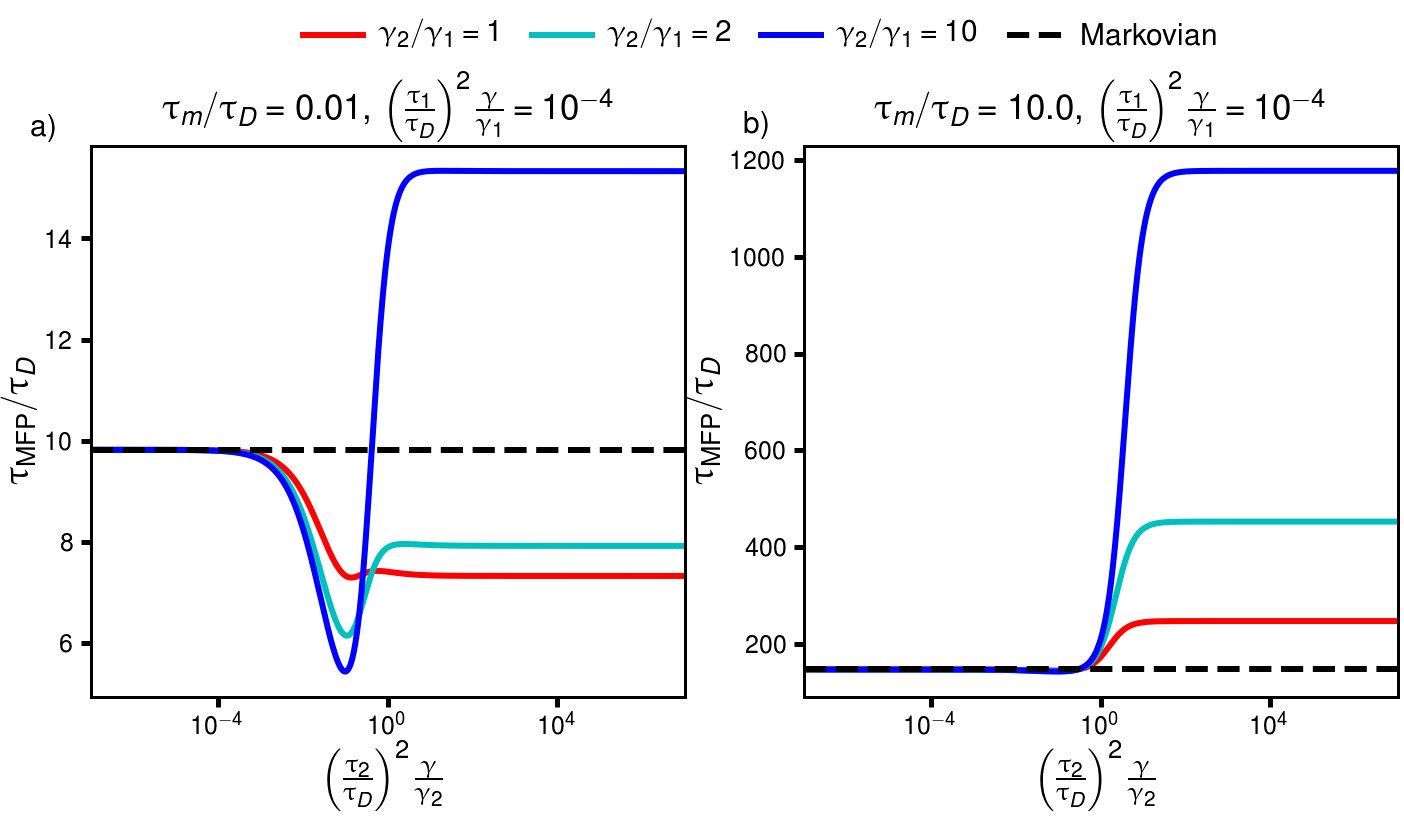

In [15]:
tm_by_td1=0.01
tm_by_td2=10.0

Index=485
Index2=470
Index3=450

#print(tg1_by_tdNew[Index])
#print(tg1_by_tdNew2[Index2])
#print(tg1_by_tdNew3[Index3])

@mpltex.acs_decorator
def my_plot(X3):
    
    fsize = np.array([3.25,2.20935])
    fig, ax = plt.subplots(1,2, figsize=(22,9))#[2*fsize[0], 1.3*fsize[1]])
    #fig, ax = plt.subplots(1,2, dpi=300)

    ax[0].plot(tg2_by_tdNew,Z[Index,:],lw=6,color='red',label=r'$\gamma_2/\gamma_1 = 1$')
    ax[0].plot(tg2_by_tdNew2,Z2[Index2,:],lw=6,color='c',label=r'$\gamma_2/\gamma_1 = 3$')
    ax[0].plot(tg2_by_tdNew3,Z3[Index3,:],lw=6,color='blue',label=r'$\gamma_2/\gamma_1 = 10$')
    ax[0].axhline(MFPT_markovian,color='black', lw=6,ls='--',label='Markovian')


    ax[0].set_xscale('log')

    #ax[0].tick_params(axis='both', labelsize=30)
    ax[0].set_xticks([1e-4,1e0,1e4])
    ax[0].set_xlim(1e-7,1e7)
    #ax.set_ylim(5,12)
    ax[0].set_ylabel(r'$\tau_{\mathrm{MFP}}/\tau_D$',size=35)
    ax[0].set_xlabel(r'$\left(\frac{\tau_{2}}{\tau_{D}}\right)^2\frac{\gamma}{\gamma_2}$',size=35)


    ax[0].set_title(r'$\tau_{m}/\tau_D =$ ' + str(tm_by_td1 ) 
             + r', $\left(\frac{\tau_{1}}{\tau_{D}}\right)^2\frac{\gamma}{\gamma_1}=10^{-4}$',size=35)  
                 #+str(tg2_by_tdNew[Index]))
        
    for spine in ['top', 'bottom', 'left', 'right']:
        ax[0].spines[spine].set_linewidth(3)
   
    ax[0].tick_params(axis='both',labelsize=25,length = 10,width = 5) 
        
    ax[0].text(4e-9,16.05,r'a)',size=30)
        
    ax[1].plot(tg2_by_tdNew10,Z10[Index,:],lw=6,color='red',label=r'$\gamma_2/\gamma_1 = 1$')
    ax[1].plot(tg2_by_tdNew102,Z102[Index2,:],lw=6,color='c',label=r'$\gamma_2/\gamma_1 = 2$')
    ax[1].plot(tg2_by_tdNew103,Z103[Index,:],lw=6,color='blue',label=r'$\gamma_2/\gamma_1 = 10$')
    ax[1].axhline(MFPT_markovian10,color='black', lw=6,ls='--',label='Markovian')


    ax[1].set_xscale('log')

    #ax[1].tick_params(axis='both', labelsize=12)
    ax[1].set_xticks([1e-4,1e0,1e4])
    ax[1].set_xlim(1e-7,1e7)
    #ax.set_ylim(120,370
    ax[1].set_ylabel(r'$\tau_{\mathrm{MFP}}/\tau_D$',size=35)
    ax[1].set_xlabel(r'$\left(\frac{\tau_{2}}{\tau_{D}}\right)^2\frac{\gamma}{\gamma_2}$',size=35)
    #ax.legend(bbox_to_anchor=(1.3, 1.05))


    ax[1].set_title(r'$\tau_{m}/\tau_D =$ ' + str(tm_by_td2 ) 
             + r', $\left(\frac{\tau_{1}}{\tau_{D}}\right)^2\frac{\gamma}{\gamma_1}=10^{-4}$',size=35)  
                 #+str(tg2_by_tdNew[Index]))
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax[1].spines[spine].set_linewidth(3)
   
    ax[1].tick_params(axis='both',labelsize=25,length = 10,width = 5) 

    ax[1].legend(bbox_to_anchor=(0.75, 1.28), ncol=4, fontsize =30)
    ax[1].text(4e-9,1258,r'b)',size=30)

    #plt.tight_layout()
    plt.savefig('Phase2.pdf', bbox_inches='tight')
    plt.show(fig)
    plt.close(fig)
my_plot(X3) 

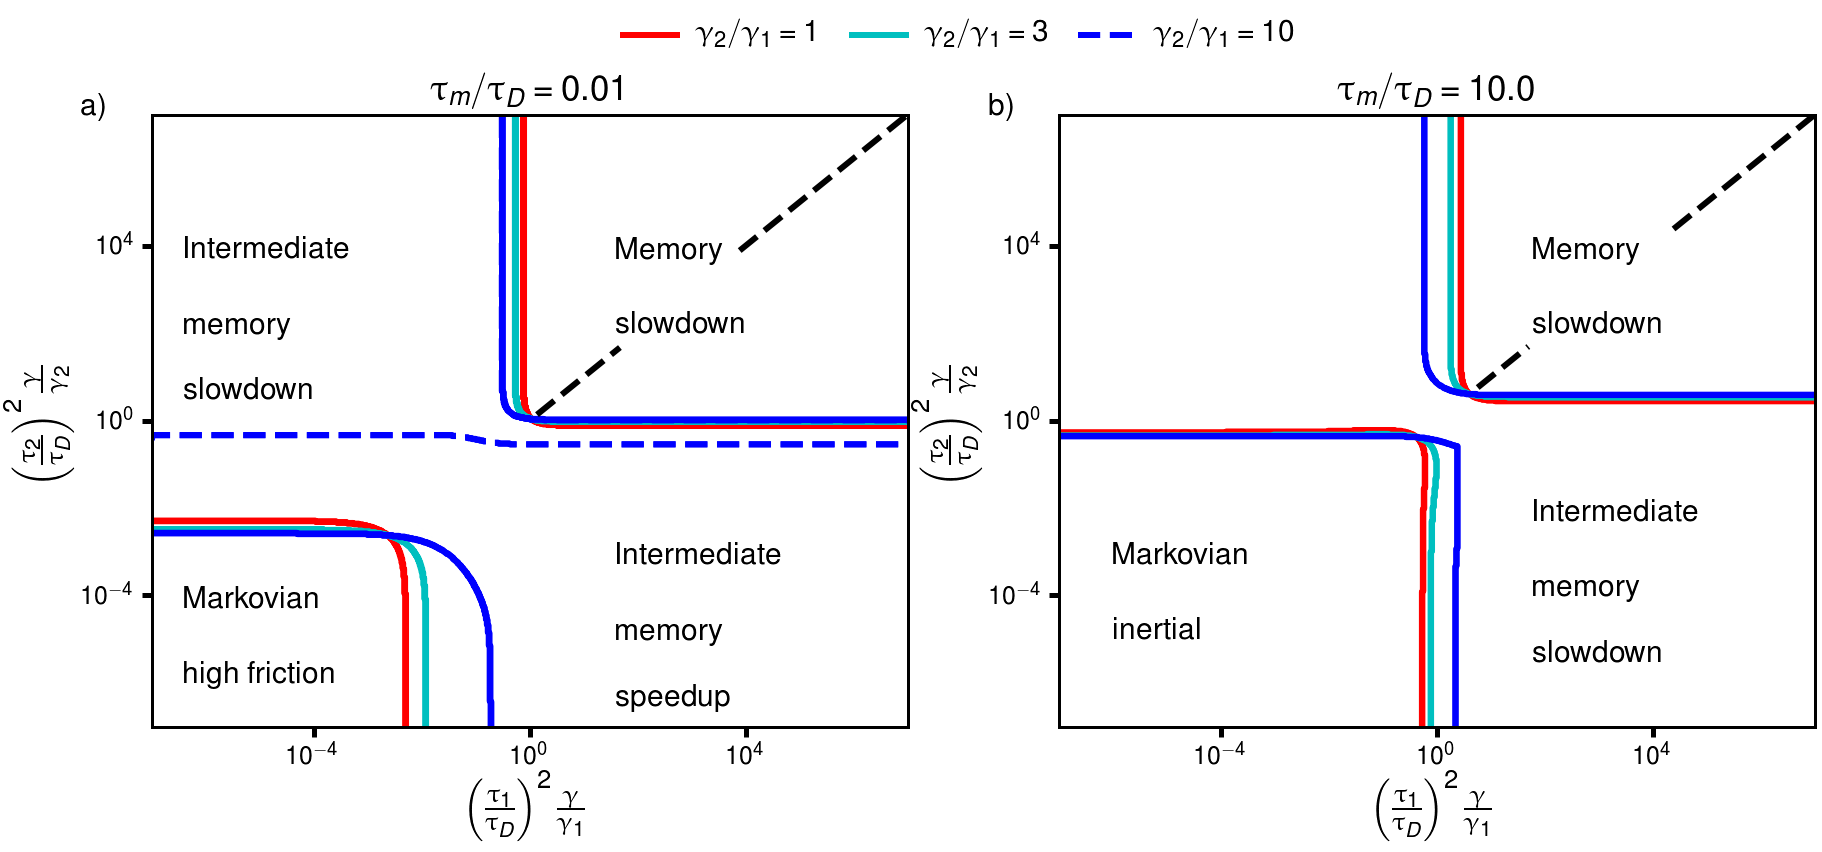

In [21]:
xP =np.logspace(-5,7.1)
mask1 = np.zeros_like(xP,dtype=bool)
mask2 = np.zeros_like(xP,dtype=bool)
mask110 = np.zeros_like(xP,dtype=bool)
mask210 = np.zeros_like(xP,dtype=bool)

for i,x in enumerate(xP):
    Index1 = np.argmin(np.fabs(tg1_by_td-x))
    Index2 = np.argmin(np.fabs(tg2_by_td-x))
#    print(X[0],x,Index1,Index2)
    if Z_phase[Index1,Index2] == 2:
        if (x < 7e1): # or x > 1e4:
            mask1[i] = 1
        elif (x > 7e3):
                #print(x)
            mask2[i] = 1
            
for i,x in enumerate(xP):
    Index110 = np.argmin(np.fabs(tg1_by_td-x ))
    Index210 = np.argmin(np.fabs(tg2_by_td-x ))
#    print(X[0],x,Index1,Index2)
    if Z_phase210[Index110,Index210] == 2:
        if (x < 7e1): # or x > 1e4:
            mask110[i] = 1
        elif (x > 2e4):
                #print(x)
            mask210[i] = 1            

xP1 = xP[mask1]
xP2 = xP[mask2] 

xP110 = xP[mask110]
xP210 = xP[mask210] 

@mpltex.acs_decorator
def my_plot(X3):
    
    #fsize = np.array([3.25,2.20935])
    fig, ax = plt.subplots(1,2, figsize=(28,10))

    #origin = 'lower'
   
    ax[0].plot(xP1+0.5,xP1+.5,ls='--',color='black',lw=6)
    ax[0].plot(xP2+3,xP2+3,ls='--',color='black',lw=6)
    
    cs = ax[0].contour(X, Y, Z_phase,linewidths=(6,), colors='r')
    cs2 = ax[0].contour(X2, Y2, Z_phase2,linewidths=(6,), colors='c')
    cs3 = ax[0].contour(X3, Y3, Z_phase3,linewidths=(6,), colors='b')
    
    ax[0].set_xlim(1e-7,1e7)
    ax[0].set_ylim(1e-7,1e7)
    
    ax[0].set_yscale('log')
    ax[0].set_xscale('log')

    ax[0].text(4e-7,5e-5,r'Markovian',size=30)
    ax[0].text(4e-7,1e-6,r'high friction',size=30)
    ax[0].text(4e1,5e-4,r'Intermediate',size=30)
    ax[0].text(4e1,1e-5,r'memory',size=30)
    ax[0].text(4e1,3e-7,r'speedup',size=30)
    ax[0].text(4e1,5e3,r'Memory',size=30)
    ax[0].text(4e1,1e2,r'slowdown',size=30)
    
    ax[0].text(4e-7,5e3,r'Intermediate',size=30)
    ax[0].text(4e-7,1e2,r'memory',size=30)
    ax[0].text(4e-7,3e0,r'slowdown',size=30)
    
    
    ax[0].tick_params(axis='both', labelsize=30)
    ax[0].set_xticks([1e-4,1e0,1e4])
    ax[0].set_yticks([1e-4,1e0,1e4])

    ax[0].set_xlabel(r'$\left(\frac{\tau_{1}}{\tau_{D}}\right)^2\frac{\gamma}{\gamma_1}$',size=35)
    ax[0].set_ylabel(r'$\left(\frac{\tau_{2}}{\tau_{D}}\right)^2\frac{\gamma}{\gamma_2}$',size=35)
    
    ax[0].set_title(r'$\tau_m/\tau_D=0.01$',size=35)
    h1,_ = cs.legend_elements()
    h2,_ = cs2.legend_elements()
    h3,_ = cs3.legend_elements()
    ax[0].legend([h1[0], h2[0], h3[1]], 
              ['$\\gamma_2/\\gamma_1=1$', '$\\gamma_2/\\gamma_1=3$','$\\gamma_2/\\gamma_1=10$'],
                 bbox_to_anchor=(1.55, 1.2),fontsize=30, ncol=3)
    
    ax[0].text(5e-9,1e7,r'a)',size=30)
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax[0].spines[spine].set_linewidth(3)
   
    ax[0].tick_params(axis='both',labelsize=25,length = 10,width = 5) 

    ax[1].plot(xP110+3,xP110+3,ls='--',color='black',lw=6)
    ax[1].plot(xP210,xP210,ls='--',color='black',lw=6)
    
    
    ax[1].contour(X10, Y10, Z_phase10, levels=3,linewidths=(6,), colors='r')
    ax[1].contour(X102, Y102, Z_phase210, levels=3, linewidths=(6,), colors='c')
    ax[1].contour(X103, Y103, Z_phase310, levels=3, linewidths=(6,), colors='b')
    
    ax[1].set_xlim(1e-7,1e7)
    ax[1].set_ylim(1e-7,1e7)
    ax[1].set_yscale('log')
    ax[1].set_xscale('log')

    ax[1].text(1e-6,5e-4,r'Markovian',size=30)
    ax[1].text(1e-6,1e-5,r'inertial',size=30)
    ax[1].text(6e1,5e-3,r'Intermediate',size=30)
    ax[1].text(6e1,1e-4,r'memory',size=30)
    ax[1].text(6e1,3e-6,r'slowdown',size=30)
    ax[1].text(6e1,5e3,r'Memory',size=30)
    ax[1].text(6e1,1e2,r'slowdown',size=30)


    ax[1].tick_params(axis='both', labelsize=30)
    ax[1].set_xticks([1e-4,1e0,1e4])
    ax[1].set_yticks([1e-4,1e0,1e4])

    ax[1].set_xlabel(r'$\left(\frac{\tau_{1}}{\tau_{D}}\right)^2\frac{\gamma}{\gamma_1}$',size=35)
    ax[1].set_ylabel(r'$\left(\frac{\tau_{2}}{\tau_{D}}\right)^2\frac{\gamma}{\gamma_2}$',size=35)
    
    ax[1].set_title(r'$\tau_m/\tau_D=10.0$',size=35)
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax[1].spines[spine].set_linewidth(3)
   
    ax[1].tick_params(axis='both',labelsize=25,length = 10,width = 5) 
    
    ax[1].text(5e-9,1e7,r'b)',size=30)
    
    #plt.subplots_adjust(bottom=0.32,wspace=1,top = 0.9)
    #plt.savefig('Phase1.pdf')
    plt.savefig('Phase1.pdf', bbox_inches='tight')
    plt.show(fig)
    #plt.close(fig)
my_plot(X3)

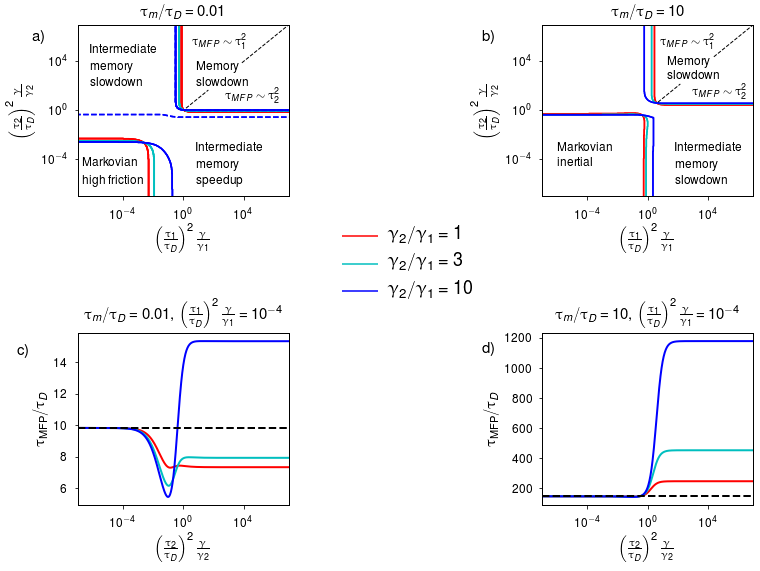

In [17]:
tm_by_td1=0.01
tm_by_td2=10.0


xP =np.logspace(-5,7.1)
mask1 = np.zeros_like(xP,dtype=bool)
mask2 = np.zeros_like(xP,dtype=bool)
mask110 = np.zeros_like(xP,dtype=bool)
mask210 = np.zeros_like(xP,dtype=bool)

for i,x in enumerate(xP):
    Index1 = np.argmin(np.fabs(tg1_by_td-x ))
    Index2 = np.argmin(np.fabs(tg2_by_td-x ))
#    print(X[0],x,Index1,Index2)
    if Z_phase[Index1,Index2] == 2:
        if (x>1e0 and x < 7e1): # or x > 1e4:
            mask1[i] = 1
        elif (x > 7e3):
                #print(x)
            mask2[i] = 1
            
for i,x in enumerate(xP):
    Index110 = np.argmin(np.fabs(tg1_by_td-x ))
    Index210 = np.argmin(np.fabs(tg2_by_td-x ))
#    print(X[0],x,Index1,Index2)
    if Z_phase210[Index110,Index210] == 2:
        if (x>3e0 and x < 2e2): # or x > 1e4:
            mask110[i] = 1
        elif (x > 2e4):
                #print(x)
            mask210[i] = 1            

xP1 = xP[mask1]
xP2 = xP[mask2] 

xP110 = xP[mask110]
xP210 = xP[mask210] 

Index=485
Index2=470
Index3=450
#print(tg1_by_tdNew[Index])
#print(tg1_by_tdNew2[Index2])
#print(tg1_by_tdNew3[Index3])

@mpltex.acs_decorator
def my_plot(X3):
    
    
    fsize = np.array([3.25,2.20935])
    fig, ax = plt.subplots(2,2, figsize=[3.5*fsize[0], 3.55*fsize[1]],gridspec_kw={'hspace': 0.8, 'wspace': 1.2})
    #plt.subplots_adjust(hspace=1.9)
    #fig.tight_layout()
    
    origin = 'lower'
    
    
    ax[0,0].plot(xP1,xP1,ls='--',color='black')
    ax[0,0].plot(xP2,xP2,ls='--',color='black')
   
    ax[0,0].contour(X, Y, Z_phase, colors='r',linewidths=1.5)
    ax[0,0].contour(X2, Y2, Z_phase2, colors='c',linewidths=1.5)
    ax[0,0].contour(X3, Y3, Z_phase3, colors='b',linewidths=1.5)
    
    ax[0,0].set_xlim(1e-7,1e7)
    ax[0,0].set_ylim(1e-7,1e7)
    
    ax[0,0].set_yscale('log')
    ax[0,0].set_xscale('log')

    ax[0,0].text(2e-7,3e-5,r'Markovian',size=12) #12 spazi tra le righe
    ax[0,0].text(2e-7,1e-6,r'high friction',size=12)

    ax[0,0].text(7e0,5e-4,r'Intermediate',size=12)
    ax[0,0].text(7e0,2e-5,r'memory',size=12)#la y è più lunga quindi 
    ax[0,0].text(7e0,1e-6,r'speedup',size=12)#bisogna cambiare l spaziatura
    
    ax[0,0].text(7e0,2e3,r'Memory',size=12)
    ax[0,0].text(7e0,1e2,r'slowdown',size=12)
    
    ax[0,0].text(7e-7,5e4,r'Intermediate',size=12)
    ax[0,0].text(7e-7,2e3,r'memory',size=12)
    ax[0,0].text(7e-7,1e2,r'slowdown',size=12)
    
    ax[0,0].text(4e0,1e5,r'$\tau_{MFP} \sim \tau_1^2$',size=12)
    ax[0,0].text(6e2,4e0,r'$\tau_{MFP} \sim \tau_2^2$',size=12)
    
    ax[0,0].text(1e-10,5e5,r'a)',size=15)
    
    ax[0,0].tick_params(axis='both', labelsize=12)
    ax[0,0].set_xticks([1e-4,1e0,1e4])
    ax[0,0].set_yticks([1e-4,1e0,1e4])

    ax[0,0].set_xlabel(r'$\left(\frac{\tau_{1}}{\tau_{D}}\right)^2\frac{\gamma}{\gamma_1}$',size=15)
    ax[0,0].set_ylabel(r'$\left(\frac{\tau_{2}}{\tau_{D}}\right)^2\frac{\gamma}{\gamma_2}$',size=15)
    
    ax[0,0].set_title(r'$\tau_m/\tau_D=0.01$',size=15)

    cs = ax[0,1].contour(X10, Y10, Z_phase10, levels=3, colors='r',linewidths=1.5)
    cs2 = ax[0,1].contour(X102, Y102, Z_phase210, levels=3, colors='c',linewidths=1.5)
    cs3 = ax[0,1].contour(X103, Y103, Z_phase310, levels=3, colors='b',linewidths=1.5)
    
    ax[0,1].plot(xP110,xP110,ls='--',color='black')
    ax[0,1].plot(xP210,xP210,ls='--',color='black')
    
    ax[0,1].set_xlim(1e-7,1e7)
    ax[0,1].set_ylim(1e-7,1e7)
    ax[0,1].set_yscale('log')
    ax[0,1].set_xscale('log')
    
    ax[0,1].text(1e-11,5e5,r'b)',size=15)

    ax[0,1].text(1e-6,5e-4,r'Markovian',size=12)
    ax[0,1].text(1e-6,3e-5,r'inertial',size=12)
    
    ax[0,1].text(6e1,5e-4,r'Intermediate',size=12)
    ax[0,1].text(6e1,2e-5,r'memory',size=12)
    ax[0,1].text(6e1,1e-6,r'slowdown',size=12)
    
    ax[0,1].text(2e1,5e3,r'Memory',size=12)
    ax[0,1].text(2e1,4e2,r'slowdown',size=12)
    
    ax[0,1].text(7e0,1e5,r'$\tau_{MFP} \sim \tau_1^2$',size=12)
    ax[0,1].text(9e2,9e0,r'$\tau_{MFP} \sim \tau_2^2$',size=12)

    ax[0,1].tick_params(axis='both', labelsize=12)
    ax[0,1].set_xticks([1e-4,1e0,1e4])
    ax[0,1].set_yticks([1e-4,1e0,1e4])
    
    h1,_ = cs.legend_elements()
    h2,_ = cs2.legend_elements()
    h3,_ = cs3.legend_elements()
    
    ax[0,1].legend([h1[0], h2[0], h3[1]], 
              ['$\\gamma_2/\\gamma_1=1$', '$\\gamma_2/\\gamma_1=3$','$\\gamma_2/\\gamma_1=10$'],
                 frameon=False, bbox_to_anchor=(-0.25, -0.4), loc='center right',
                   fontsize =18)

    ax[0,1].set_xlabel(r'$\left(\frac{\tau_{1}}{\tau_{D}}\right)^2\frac{\gamma}{\gamma_1}$',size=15)
    ax[0,1].set_ylabel(r'$\left(\frac{\tau_{2}}{\tau_{D}}\right)^2\frac{\gamma}{\gamma_2}$',size=15)
    
    ax[0,1].set_title(r'$\tau_m/\tau_D=10$',size=15)
        
        
    ax[1,0].plot(tg2_by_tdNew,Z[Index,:],lw=2,color='red')#,label=r'$\gamma_2/\gamma_1 = 1$')
    ax[1,0].plot(tg2_by_tdNew2,Z2[Index2,:],lw=2,color='c')#,label=r'$\gamma_2/\gamma_1 = 3$')
    ax[1,0].plot(tg2_by_tdNew3,Z3[Index3,:],lw=2,color='blue')#,label=r'$\gamma_2/\gamma_1 = 10$')
    ax[1,0].axhline(MFPT_markovian,color='black', lw=2,ls='--')#,label='Markovian')

    ax[1,0].set_xscale('log')
    
    ax[1,0].text(1e-11,14.5,r'c)',size=15)

    ax[1,0].tick_params(axis='both', labelsize=12)
    ax[1,0].set_xticks([1e-4,1e0,1e4])
    ax[1,0].set_xlim(1e-7,1e7)
    #ax.set_ylim(5,12)
    ax[1,0].set_ylabel(r'$\tau_{\mathrm{MFP}}/\tau_D$',size=15)
    ax[1,0].set_xlabel(r'$\left(\frac{\tau_{2}}{\tau_{D}}\right)^2\frac{\gamma}{\gamma_2}$',size=15)


    ax[1,0].set_title(r'$\tau_{m}/\tau_D =$ ' + str(tm_by_td1 ) 
             + r', $\left(\frac{\tau_{1}}{\tau_{D}}\right)^2\frac{\gamma}{\gamma_1}=10^{-4}$',size=15)  
                 #+str(tg2_by_tdNew[Index]))
        
    ax[1,1].plot(tg2_by_tdNew10,Z10[Index,:],lw=2,color='red')#,label=r'$\gamma_2/\gamma_1 = 1$')
    ax[1,1].plot(tg2_by_tdNew102,Z102[Index2,:],lw=2,color='c')#,label=r'$\gamma_2/\gamma_1 = 2$')
    ax[1,1].plot(tg2_by_tdNew103,Z103[Index,:],lw=2,color='blue')#,label=r'$\gamma_2/\gamma_1 = 10$')
    ax[1,1].axhline(MFPT_markovian10,color='black', lw=2,ls='--')#,label='Markovian')

    #ax[1,1].legend(bbox_to_anchor=(-0.4, 0.7), fontsize =18,loc='center right')
    
    
    ax[1,1].set_xscale('log')
    
    ax[1,1].text(1e-11,1100,r'd)',size=15)
    
    ax[1,1].tick_params(axis='both', labelsize=12)
    ax[1,1].set_xticks([1e-4,1e0,1e4])
    ax[1,1].set_xlim(1e-7,1e7)
    
    ax[1,1].set_ylabel(r'$\tau_{\mathrm{MFP}}/\tau_D$',size=15)
    ax[1,1].set_xlabel(r'$\left(\frac{\tau_{2}}{\tau_{D}}\right)^2\frac{\gamma}{\gamma_2}$',size=15)
    #ax.legend(bbox_to_anchor=(1.3, 1.05))

    ax[1,1].set_title(r'$\tau_{m}/\tau_D = 10$' +r', $\left(\frac{\tau_{1}}{\tau_{D}}\right)^2\frac{\gamma}{\gamma_1}=10^{-4}$',size=15)  
    #ax[1,1].set_title(r'$\tau_{m}/\tau_D =$ ' + str(tm_by_td2 ) 
     #        + r', $\left(\frac{\tau_{1}}{\tau_{D}}\right)^2\frac{\gamma}{\gamma_1}=10^{-4}$',size=15)  
                 #+str(tg2_by_tdNew[Index]))
    
    
    plt.savefig('newfigure/Articol/FinalFigure.pdf', bbox_inches='tight')
    plt.show(fig)
    plt.close(fig)
my_plot(X3) 